In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Classification Task:

In this section, we find the best classifier that can be used to predict the variable - 'Attrition' based on the various features present in the dataset.

As in our case, it is critical to classify Attrition correctly we will be considering Recall of 1 (as we wish to have less False Negatives predicted by our model) along with overall accuracy for our evaluation metric of the model.

In [12]:
import pandas as pd
import numpy as np

import  matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Removing the unwanted EmployeeNumber,Over18 and EmployeeCount column

In [15]:
df = df.drop(['EmployeeNumber'],axis = 1)
df = df.drop(['Over18'],axis = 1)
df = df.drop(['EmployeeCount'],axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Mapping the values to the ordinal variable

In [16]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype(int)
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0}).astype(int)
df['OverTime'] = df['OverTime'].map({'Yes':0, 'No':1}).astype(int)

### Using dummy variable to convert categorical variables to numerical variables

In [17]:
dummy1 = pd.get_dummies(df['EducationField'])
dummy2 = pd.get_dummies(df['JobRole'])
dummy3 = pd.get_dummies(df['MaritalStatus'])
dummy4 = pd.get_dummies(df['Department'])

### Joining the original dataframe and all the dummy variables produced


In [18]:
df=pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)

### Dropping the original variables from the dataframe

In [19]:
df=df.drop(['EducationField','JobRole','MaritalStatus','Department'],axis=1)

### Mapping Attrition variable

In [20]:
df['Attrition'] = df['Attrition'].map({'Yes':0, 'No':1}).astype(int)

### Attrition column will be assigned to Y and all other variables are assigned to X

In [21]:
X=df.drop(['Attrition'],axis=1)
Y=df['Attrition']

In [22]:
X.shape

(1470, 48)

From the shape function on X, we know that the dataframe has *1470 data points* and *34 features* that can be used to predict 'Attrition' stored in y. 

The different classification models that can be used for this task are:
- KNN Classification
- Logistic Regression
- Support Vector Machine - Linear SVC
- Support Vector Machine with Kernel trick – Rbf, Poly, Linear
- Decision Tree

But before we start applying these classification models, a three-fold split is performed on the entire dataset

Thus, we fit the above models using train and validation set and after finding the best classifier, we check for the accuracy of the best classifier using test set.

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X,Y, random_state = 2)

# split train+validation set into training and validation sets
X_train_org, X_valid_org, y_train, y_valid = train_test_split(X_trainval_org, y_trainval, random_state=1)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_valid = scaler.fit_transform(X_valid_org)
X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.transform(X_test_org)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 826   size of validation set: 276   size of test set: 368



From the results, it can be said that the training set has 826 data points, validation set has 276 data points and testing set has 368 data points.

Let us fit model - KNN Classifier using train and validation set and find the best parameter - *'K'* using naive grid search.

## KNN Classification

Best score: 0.84
Best parameters: {'K': 8}


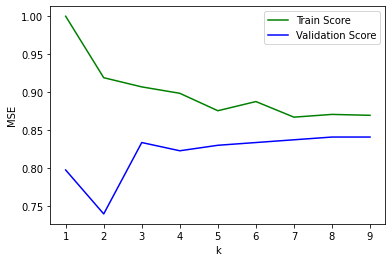

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline
train_score_array = []
valid_score_array = []

best_score = 0

for k in range(1,10):
    knn_clf = KNeighborsClassifier(k)
    knn_clf.fit(X_train, y_train)
    train_score_array.append(knn_clf.score(X_train, y_train))
    score = knn_clf.score(X_valid, y_valid)
    valid_score_array.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'K': k}
            best_K = k

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, valid_score_array, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of K for this model is 8 which gives an accuracy of 0.84 on the validation dataset.

We review this parameter using cross validation:

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier(best_K)

scores = cross_val_score(knn_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.8018018  0.83783784 0.86363636 0.85454545 0.88181818 0.85454545
 0.86363636 0.84545455 0.84545455 0.85454545]
Average cross-validation score: 0.85


The average cross-validation score for the parameter K = 8 is 0.85 

Let us find the best parameter for this model using GridSearchCV:

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.85


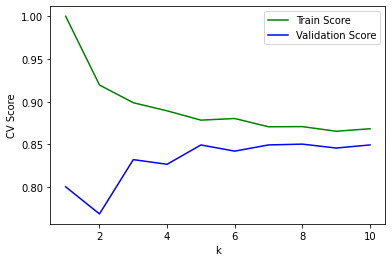

In [27]:
k_range = list(range(1, 11))

param_grid = dict(n_neighbors=k_range)

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
x_axis = range(1,11)
plt.plot(x_axis, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('CV Score')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

The best parameter for this model using GridSearchCV is 8. Eventhough we found the best parameter as K = 8  using the naive grid search, but with parameter K = 8, the average cross validation is 0.85 which is better than the average cross validation of the naive grid search. 

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

 
pred_knn = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_knn))

confusion = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_knn))

0.8396739130434783
Confusion matrix:
[[  9  53]
 [  6 300]]
              precision    recall  f1-score   support

           0       0.60      0.15      0.23        62
           1       0.85      0.98      0.91       306

    accuracy                           0.84       368
   macro avg       0.72      0.56      0.57       368
weighted avg       0.81      0.84      0.80       368



In [29]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_knn)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.14516129032258066
F1-Score    : 0.2337662337662338


Thus, the accuracy,recall and f1-score of this model for the best parameter - K are 0.85,0.15 and 0.23 respectively

In [30]:
Classification_Scores={}

Classification_Scores.update({'KNN Classification':[metrics.accuracy_score(y_test,pred_knn),recall[0],fscore[0]]})

In [31]:
columns = ['Classifier','Best Parameters','Accuracy_Score','Recall of 0']
clf_model_para = pd.DataFrame(columns=columns)

clf_model_para=clf_model_para.append({'Classifier':'KNN Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_knn),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Logistic Regression

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best score: 0.89
Best parameters: {'C': 1, 'penalty': 'l2'}


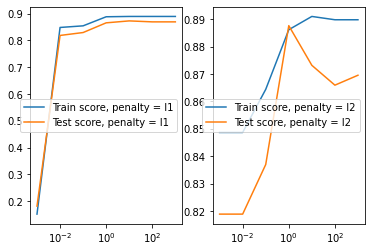

In [33]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
valid_score_l1 = []
valid_score_l2 = []

best_score = 0
l1 = 'l1'
l2 = 'l2'

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs')
    
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    
    score = log_l1.score(X_valid, y_valid)
    valid_score_l1.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty': l1}
            best_C = c
            best_Penalty = 'l1'
    
    score = log_l2.score(X_valid, y_valid)
    valid_score_l2.append(score)
    if score > best_score:
            best_score = score
            best_parameters = {'C': c , 'penalty' : l2}
            best_C = c
            best_Penalty = 'l2'
    
plt.subplot(1,2,1)
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, valid_score_l1, label = 'Test score, penalty = l1')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, valid_score_l2, label = 'Test score, penalty = l2')
plt.xscale('log')
plt.legend()

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

The best parameter value of C and Penalty for this model are 1 and `l2` respectively which gives a score of 0.88 on the validation dataset.

We review this parameter using cross validation.

In [34]:
log_grid = LogisticRegression(penalty = best_Penalty, C = best_C)

scores = cross_val_score(log_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.88288288 0.86486486 0.87272727 0.90909091 0.9        0.89090909
 0.82727273 0.87272727 0.88181818 0.90909091]
Average cross-validation score: 0.88


The average cross-validation score for the best parameters (1 and l2) is 0.88.

Let us find the best parameter for this model using GridSearchCV:

In [35]:
param_grid = {'penalty': ['l1','l2'],
             'C':  [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_se

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.88


The best parameter for this model using GridSearchCV is `C=1` and `penalty = l2` giving average cross-validation score same as that of naive grid search.

Thus, we will choose the best parameter for Logistic Regression as `C=1` and `penalty = l2`.

In [36]:
pred_log = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_log))

confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_log))

0.875
Confusion matrix:
[[ 20  42]
 [  4 302]]
              precision    recall  f1-score   support

           0       0.83      0.32      0.47        62
           1       0.88      0.99      0.93       306

    accuracy                           0.88       368
   macro avg       0.86      0.65      0.70       368
weighted avg       0.87      0.88      0.85       368



In [37]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_log)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3225806451612903
F1Score    : 0.4651162790697674


Thus, the accuracy,recall and f1 score of this model for the best parameter  C=1 and penalty = l2 are 0.875,0.32 and 0.47

In [39]:
Classification_Scores.update({'Logistic Classification':[metrics.accuracy_score(y_test,pred_log),recall[0],fscore[0]]})

In [40]:
clf_model_para=clf_model_para.append({'Classifier':'Logistic Classification',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_log),
                                      'Recall of 0':recall[0]},ignore_index=True)

## Support-Vector Machine

Let us apply some SVM models on this dataset.

### LinearSVC

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best score: 0.89
Best parameters: {'C': 1}


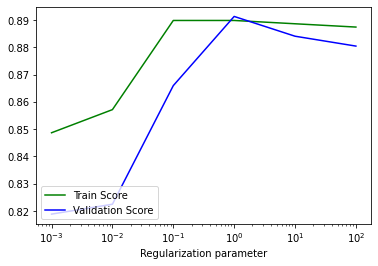

In [41]:
from sklearn.svm import LinearSVC

train_score_list = []
valid_score_list = []

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    linear_svc = LinearSVC(C=C, max_iter=10000)
    linear_svc.fit(X_train,y_train)
    train_score_list.append(linear_svc.score(X_train,y_train))
    score = linear_svc.score(X_valid, y_valid)
    valid_score_list.append(score)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
        best_C = C

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, valid_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization parameter')

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Using LinearSVC, we get a score of 0.89 for the regularization parameter C = 1.

Lets check the average cross-validation score for this parameter C = 1.

In [42]:
linear_svc_grid = LinearSVC(C = best_C, max_iter=10000)
scores = cross_val_score(linear_svc_grid, X_trainval, y_trainval, cv = 10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.85585586 0.87387387 0.86363636 0.9        0.9        0.89090909
 0.83636364 0.86363636 0.89090909 0.9       ]
Average cross-validation score: 0.88


We get an average cross-validation score of 0.88 for C = 1. 

The average cross validation score using GridSearchCV is given by:

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Best parameters: {'C': 10}
Best cross-validation score: 0.88


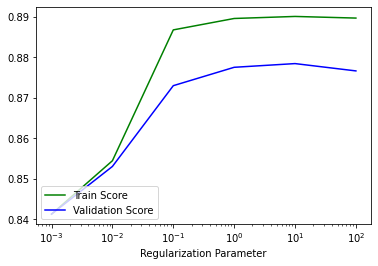

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(max_iter=10000), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

df = pd.DataFrame(grid_search.cv_results_)
%matplotlib inline
plt.plot(x_range, df.mean_train_score, c = 'g', label = 'Train Score')
plt.plot(x_range, df.mean_test_score, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Regularization Parameter')

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

From the results of both the grid search methods - naive grid search and GridSearchCV, we get the same average cross-validation score of 0.88 for regularization parameter `c=10` compared to naive grid search. 

Also, from the above graph we see that for this model, with the increase in the value of regularization parameter i.e. when less regularization is done, the model has more features and performs better compared to when more regularization is done.

In [44]:
pred_linear_svc = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear_svc))

confusion = confusion_matrix(y_test, pred_linear_svc)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_linear_svc))

0.8695652173913043
Confusion matrix:
[[ 21  41]
 [  7 299]]
              precision    recall  f1-score   support

           0       0.75      0.34      0.47        62
           1       0.88      0.98      0.93       306

    accuracy                           0.87       368
   macro avg       0.81      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



In [45]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_linear_svc)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
F1Score    : 0.4666666666666667


Thus, the accuracy,recall and F1Score of this model for the best parameter - C=1 are 0.8699,0.34 and 0.47 respectively

In [46]:
Classification_Scores.update({'Linear_SVC':[metrics.accuracy_score(y_test,pred_linear_svc),recall[0],fscore[0]]})

In [47]:
clf_model_para=clf_model_para.append({'Classifier':'Linear_SVC',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_linear_svc),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - rbf

The hyper-parameters for this model are `gamma` and regularlization term `C`.

In [48]:
from sklearn.svm import SVC

train_score_list = []
valid_score_list = []

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        score = svc_rbf.score(X_valid, y_valid)
        valid_score_list.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma , 'C' : C}
            best_Gamma = gamma
            best_C = C

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'gamma': 0.01, 'C': 100}


The best paramaters for this kernel are `gamma = 0.01` and `C = 100` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [49]:
svc_rbf_grid = SVC(kernel='rbf', gamma = best_Gamma, C = best_C)

scores = cross_val_score(svc_rbf_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.85585586 0.86486486 0.89090909 0.90909091 0.89090909 0.89090909
 0.84545455 0.85454545 0.88181818 0.9       ]
Average cross-validation score: 0.88


From the results of both the grid search methods - we got the average cross validation score as 0.87 and 0.88 

Let us check for the average cross-validation score using GridSearchCV.

In [51]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are C = 100 and gamma = 0.01. Compared to the best parameters we got from naive grid search (C = 100 and gamma = 0.01), the average cross-validation score increased from 0.87 to 0.88.

Thus the best parameters for this model are C = 100 and gamma = 0.01.

In [52]:
pred_rbf = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_rbf))

confusion = confusion_matrix(y_test, pred_rbf)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_rbf))

0.875
Confusion matrix:
[[ 21  41]
 [  5 301]]
              precision    recall  f1-score   support

           0       0.81      0.34      0.48        62
           1       0.88      0.98      0.93       306

    accuracy                           0.88       368
   macro avg       0.84      0.66      0.70       368
weighted avg       0.87      0.88      0.85       368



In [53]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_rbf)

print ('Recall    : {}'.format(recall[0]))
print ('F1-Score    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
F1-Score    : 0.4772727272727273


Thus, the accuracy,recall and f1-score of this model for the best parameter - C=100 and gamma = 0.01 are 0.875,0.34 and 0.48  respectively.

In [54]:
Classification_Scores.update({'SVC RBF Kernel':[metrics.accuracy_score(y_test,pred_rbf),recall[0],fscore[0]]})

In [55]:
clf_model_para=clf_model_para.append({'Classifier':'SVC RBF Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_rbf),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVC - Poly

In [56]:
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='poly', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.88
Best parameters: {'degree': 1, 'C': 0.01, 'gamma': 100}


The best paramaters for this kernel are `degree = 1`, `gamma = 100` and `C = 0.01` which gives a score of 0.88 on the validation set.
The average cross-validation score for these parameters is:

In [57]:
svc_poly_grid = SVC(kernel='poly',degree = best_Degree, C=best_C, gamma = best_Gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.83783784 0.83783784 0.84545455 0.84545455 0.84545455 0.84545455
 0.84545455 0.83636364 0.83636364 0.83636364]
Average cross-validation score: 0.84


The average cross-validation score for the best parameters is 0.84.

Let's check for the best parameter using GridSearchCV:

In [58]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 1, 'gamma': 1}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are degree = 1, C = 1 and gamma = 100.

Compared to the best parameters we got from naive grid search (degree = 1, C = 1 and gamma = 100), the average cross-validation score remained same (0.88).

Thus the best parameters for this model are degree = 1, C = 1 and gamma = 100. 

In [59]:
pred_poly = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_poly))

confusion = confusion_matrix(y_test, pred_poly)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_poly))

0.8668478260869565
Confusion matrix:
[[ 20  42]
 [  7 299]]
              precision    recall  f1-score   support

           0       0.74      0.32      0.45        62
           1       0.88      0.98      0.92       306

    accuracy                           0.87       368
   macro avg       0.81      0.65      0.69       368
weighted avg       0.85      0.87      0.84       368



In [60]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_poly)

print ('Recall    : {}'.format(recall[0]))
print ('FScore    : {}'.format(fscore[0]))

Recall    : 0.3225806451612903
FScore    : 0.449438202247191


Thus, the accuracy,recall and f1score of this model for the best parameter - degree = 1, C = 1 and gamma = 100 are 0.88,0.32 and 0.45 respectively.

In [62]:
Classification_Scores.update({'SVC Poly Kernel':[metrics.accuracy_score(y_test,pred_poly),recall[0],fscore[0]]})

In [64]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Kernel',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_poly),
                                      'Recall of 0':recall[0]},ignore_index=True)

### SVM-linear

In [65]:
from sklearn.svm import SVC
train_score_list = []
valid_score_list = []

best_score = 0

for degree in range(1,5):
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
            svc_poly = SVC(kernel='linear', degree = degree, C=C, gamma = gamma)
            svc_poly.fit(X_train,y_train)
            train_score_list.append(svc_poly.score(X_train,y_train))
            score = svc_poly.score(X_valid, y_valid)
            valid_score_list.append(score)
            if score > best_score:
                best_score = score
                best_parameters = {'degree': degree , 'C' : C, 'gamma' : gamma}
                best_Degree = degree
                best_C = C
                best_gamma = gamma

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.88
Best parameters: {'degree': 1, 'C': 1, 'gamma': 0.001}


The best paramaters for this kernel are `degree = 1`, `gamma = 0.001` and `C = 1` which gives a score of 0.87 on the validation set.
The average cross-validation score for these parameters is:

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc_poly_grid = SVC(kernel='linear',degree = best_Degree, C=best_C, gamma = best_gamma)

scores = cross_val_score(svc_poly_grid, X_trainval, y_trainval, cv =10, scoring = 'accuracy')
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.85585586 0.87387387 0.87272727 0.88181818 0.9        0.88181818
 0.85454545 0.85454545 0.89090909 0.89090909]
Average cross-validation score: 0.88


The average cross-validation score for the best parameters is 0.88.

Let's check for the best parameter using GridSearchCV:

In [67]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1,2,3,4,5]}

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_trainval, y_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.001}
Best cross-validation score: 0.88


The best parameters that we got from GridSearchCV are degree = 1, C = 100 and gamma = 0.001.

Compared to the best parameters we got from naive grid search (degree = 1, C = 1 and gamma = 0.001), the average cross-validation score remained same (0.88).

Thus the best parameters for this model are degree = 1, C = 100 and gamma = 0.001.

In [68]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 
pred_linear = grid_search.predict(X_test)
print(metrics.accuracy_score(y_test,pred_linear))

confusion = confusion_matrix(y_test, pred_linear)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_linear))

0.8668478260869565
Confusion matrix:
[[ 20  42]
 [  7 299]]
              precision    recall  f1-score   support

           0       0.74      0.32      0.45        62
           1       0.88      0.98      0.92       306

    accuracy                           0.87       368
   macro avg       0.81      0.65      0.69       368
weighted avg       0.85      0.87      0.84       368



In [69]:
Classification_Scores.update({'SVC Poly Linear':[metrics.accuracy_score(y_test,pred_linear),recall[0],fscore[0]]})

In [70]:
clf_model_para=clf_model_para.append({'Classifier':'SVC Poly Linear',
                                      'Best Parameters':grid_search.best_params_,
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_linear),
                                      'Recall of 0':recall[0]},ignore_index=True)

### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_trainval, y_trainval)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_trainval, y_trainval)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.799


We are getting an accuracy of 1.00 on the training set as it goes till highest depth. We are getting an accuracy of 0.799 on the testing set.

Let us check for the average cross-validation score for this model using cross_val_score. 

In [72]:
dtree_cv = DecisionTreeClassifier()
scores = cross_val_score(dtree_cv, X_trainval, y_trainval, cv = 10, scoring = 'accuracy' )
print("Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78378378 0.75675676 0.80909091 0.84545455 0.75454545 0.72727273
 0.76363636 0.80909091 0.83636364 0.80909091]
Average cross-validation score: 0.79


In [73]:
pred_tree = dtree.predict(X_test)
print(metrics.accuracy_score(y_test,pred_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test,pred_tree))

0.7989130434782609
Confusion matrix:
[[ 21  41]
 [ 33 273]]
              precision    recall  f1-score   support

           0       0.39      0.34      0.36        62
           1       0.87      0.89      0.88       306

    accuracy                           0.80       368
   macro avg       0.63      0.62      0.62       368
weighted avg       0.79      0.80      0.79       368



In [74]:
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test,pred_tree)

print ('Recall    : {}'.format(recall[0]))
print ('F1Score    : {}'.format(fscore[0]))

Recall    : 0.3387096774193548
F1Score    : 0.3620689655172414


In [75]:
Classification_Scores.update({'Decison Tree':[metrics.accuracy_score(y_test,pred_tree),recall[0],fscore[0]]})

In [76]:
clf_model_para=clf_model_para.append({'Classifier':'Decision Tree',
                                      'Best Parameters':' ',
                                      'Accuracy_Score':metrics.accuracy_score(y_test,pred_tree),
                                      'Recall of 0':recall[0]},ignore_index=True)

### Best Classifier

Let's check for the accuracy score and recall for all the above model: 

SVC Poly Linear depicts SVC Linear

In [77]:
Classification_Scores=pd.DataFrame(Classification_Scores)
Classification_Scores.rename({0:'Accuracy_Score',1:'Recall',2:'F1-Score'})

,KNN Classification,Logistic Classification,Linear_SVC,SVC RBF Kernel,SVC Poly Kernel,SVC Poly Linear,Decison Tree
Accuracy_Score,0.839674,0.875000,0.869565,0.875000,0.866848,0.866848,0.798913
Recall,0.145161,0.322581,0.338710,0.338710,0.322581,0.322581,0.338710
F1-Score,0.233766,0.465116,0.466667,0.477273,0.449438,0.449438,0.362069


<Figure size 4032x360 with 0 Axes>

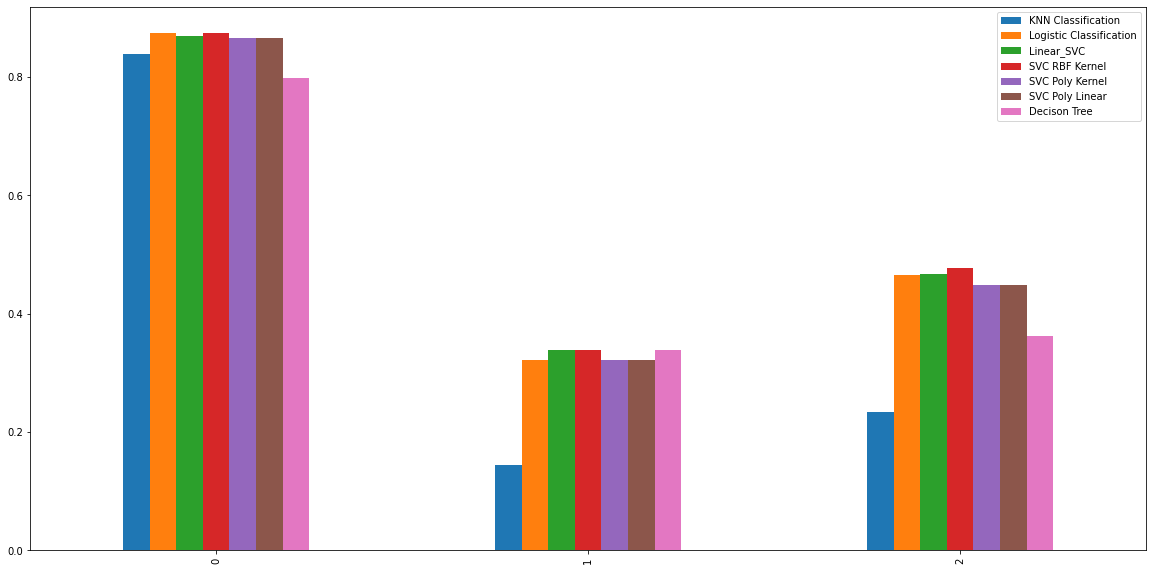

In [78]:
plt.figure(figsize=(56,5))

Classification_Scores.plot.bar(figsize=(20,10))

Our evaluation strategy is based on the having best recall value and best F1-Score as the dataset is imbalanced and (as we do not wish to misclassify the employess which are likely to cause attrition i.e. have less false negatives in our confusion matrix)

From the above graph, it can be said that we are getting an accuracy of 0.88, recall score of 0.34 and f1-score of 0.48 for SVC - RBF

Thus, it is the best classifier that can be used for predicting the attrition rate.